In [1]:
import os
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

import statsmodels.api as sm

In [2]:
# 데이터 불러오기
boston = pd.read_csv("./data/Boston_house.csv")
boston.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,Target
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [3]:
boston_data = boston.drop(['Target'], axis=1)
target = boston[['Target']]

# 단순선형회귀분석

In [4]:
lstat = boston['LSTAT']

lstat1 = sm.add_constant(lstat, has_constant='add')

simple_model = sm.OLS(target, lstat1).fit()
simple_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Thu, 02 Jul 2020   Prob (F-statistic):           5.08e-88
Time:                        17:53:42   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         34.5538      0.563     61.415      0.000      33.448      35.659
LSTAT         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [5]:
pred = simple_model.predict(lstat1)

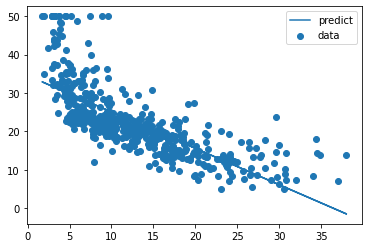

In [6]:
plt.scatter(lstat, target, label="data")
plt.plot(lstat, pred, label="predict")
plt.legend()
plt.show()

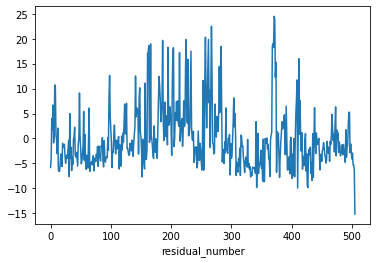

In [7]:
simple_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

# 다중선형회귀분석

## crim, rm, lstat 세개의 변수를 통해 다중회귀적합

In [8]:
x_data = boston[['CRIM','RM','LSTAT']] # 변수 여러개
x_data.head()

,CRIM,RM,LSTAT
0,0.00632,6.575,4.98
1,0.02731,6.421,9.14
2,0.02729,7.185,4.03
3,0.03237,6.998,2.94
4,0.06905,7.147,5.33


In [9]:
x_data1 = sm.add_constant(x_data, has_constant='add')

In [10]:
multi_model = sm.OLS(target, x_data1).fit()

multi_model.summary()  # 단순선형회귀분석의 회귀 계수(R2)와 비교

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Target   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.644
Method:                 Least Squares   F-statistic:                     305.2
Date:                Thu, 02 Jul 2020   Prob (F-statistic):          1.01e-112
Time:                        17:53:42   Log-Likelihood:                -1577.6
No. Observations:                 506   AIC:                             3163.
Df Residuals:                     502   BIC:                             3180.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.5623      3.166     -0.809      0.419      -8.783       3.658
CRIM          -0.1029      0.032     -3.215      0.001      -0.166      -0.040
RM             5.2170      0.442     11.802      0.000       4.348       6.085
LSTAT         -0.5785      0.048    -12.135      0.000      -0.672      -0.485
==============================================================================
Omnibus:                      171.754   Durbin-Watson:                   0.822
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              628.308
Skew:                           1.535   Prob(JB):                    3.67e-137
Kurtosis:                       7.514   Cond. No.                         216.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## 행렬연산을 통해 beta구하기

In [11]:
from numpy import linalg # 행렬연산

ba = linalg.inv((np.dot(x_data1.T, x_data1))) # (X'X)-1 : -1 = 역행렬

beta = np.dot(np.dot(ba, x_data1.T), target) # (X'X)-1X'y

# beta = summary의 coef
beta

array([[-2.56225101],
       [-0.10294089],
       [ 5.21695492],
       [-0.57848582]])

## residual plot

In [12]:
pred_m = multi_model.predict(x_data1)

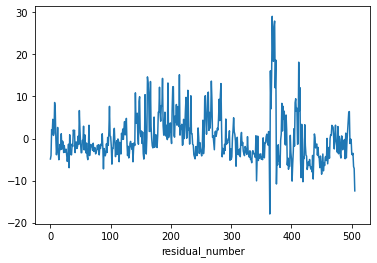

In [13]:
multi_model.resid.plot()
plt.xlabel("residual_number")
plt.show()

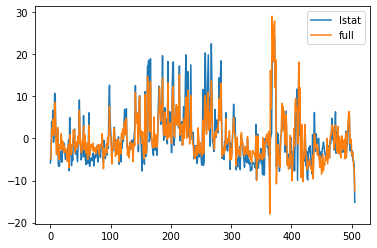

In [14]:
# 단순선형회귀 vs 다중선형회귀 비교

simple_model.resid.plot(label="lstat")
multi_model.resid.plot(label="full")
plt.legend()